In [5]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 1.9 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/11.0 MB 1.7 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/11.0 MB 1.6 MB/s eta 0:00:07
   ---- ----------------------------------- 1.3/11.0 MB 1.5 MB/s eta 0:00:07
   ----- ---------------------------------- 1.6/11.0 MB 1.4 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.0 MB 1.4 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.0 MB 1.4 MB/s eta 0:00:07
   --------- ------------------------------ 2.6/11.0 MB 1.4 MB/s eta 0:00:07
   ---------- ----------------------------- 2.9/11.0 MB 1.4 MB/s eta 0:00:06
   ----------- ---------------------------- 3.1/11.0 MB 1.4 MB/s eta 0:00:06
   ---------

In [6]:
import matplotlib.pyplot as plt
import random
import math
from IPython import display
import pandas as pd


In [7]:
df = pd.read_csv('data_p.csv')
df.head()

,X1,X2,Y
0,58,85,1
1,68,49,0
2,67,79,1
3,63,88,1
4,57,55,1


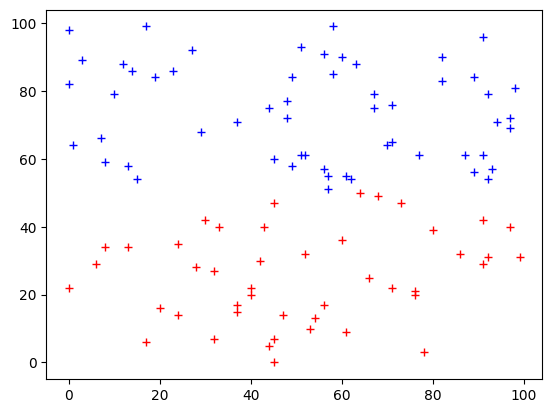

In [8]:
X1 = df['X1'].values
X2 = df['X2'].values
Y = df['Y'].values

for i  in range(len(Y)):
  if Y[i] == 0:
    plt.plot(X1[i], X2[i], 'r+')
  else:
    plt.plot(X1[i], X2[i], 'b+')

plt.show()



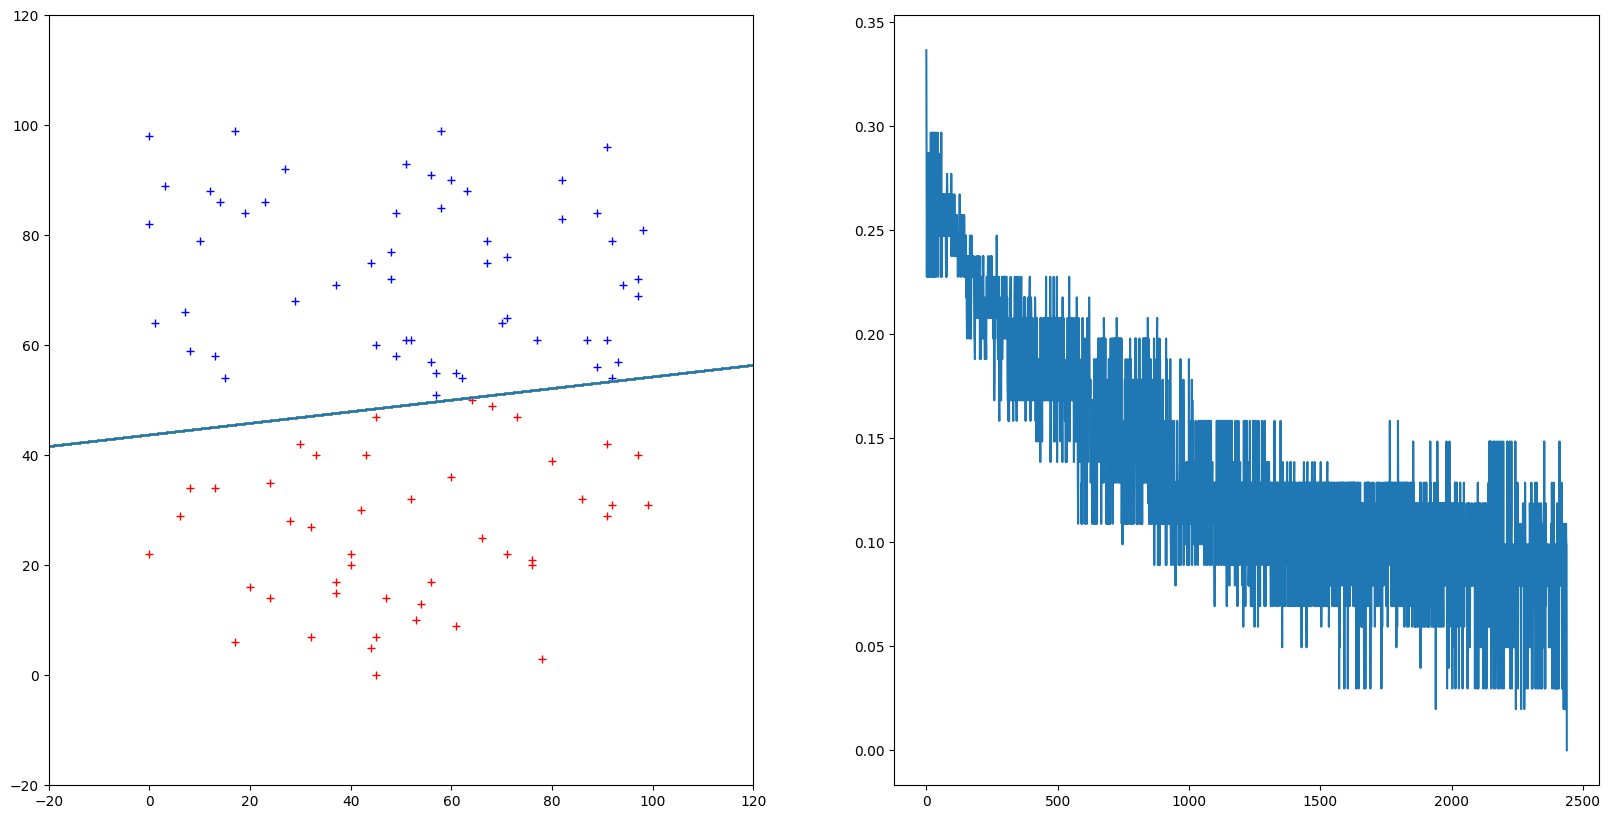

In [9]:
from re import I
w = [random.uniform(-1,1), random.uniform(-1,1)]
b = random.uniform(-1,1)
lr = 0.01
theta = 0.0

count = 0
epoch = 0
loss = []
while count < len(Y):
  total_error = 0
  for i in range(len(Y)):
    ws = w[0]*X1[i] + w[1]*X2[i] + b
    pred = 0
    if ws > theta:
      pred = 1

    error = Y[i] - pred
    if error != 0:
      count = 0
      total_error += math.sqrt(error**2)
      w[0] = w[0] + lr*error*X1[i]
      w[1] = w[1] + lr*error*X2[i]
      b = b + lr*error
    else:
      count += 1

  loss.append(total_error/len(Y))
  epoch += 1


plt.figure(figsize=(20, 10))
display.clear_output(wait=True)
plt.subplot(1, 2, 1)
for i  in range(len(Y)):
  if Y[i] == 0:
    plt.plot(X1[i], X2[i], 'r+')
  else:
    plt.plot(X1[i], X2[i], 'b+')


  xx = plt.xlim()
  yy =[]
  xint = (theta-b) / w[0]
  yint = (theta-b) / w[1]
  slope = -yint/xint
  for x in xx:
    yy.append(slope*x+yint)

  plt.plot(xx, yy)
  plt.xlim([-20, 120])
  plt.ylim([-20, 120])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.show()